# Exploratory Data Analysis (EDA) 

## Rectangular Data:
- The data in the form of the spreadsheet like table having variables on columns and sub varaibles on rows.


### Statisticians vs Data Scientists
| Job Role | Terminology |
| :------: | :---------: |
| Statisticians | Predictor variable predict a response or dependent variable. |
| Data Scientists | Features will predict a target. |

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset

medal = pd.read_excel(r"Medals.xlsx")
medal.head()

c:\Users\cw\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


## Estimates of Location

In [3]:
# Mean
medal.Total.mean()

11.612903225806452

## Weighted Mean:
- Same as mean, except you multiply every value by some x subset i before adding them up and dividing by the number of instances. 
- Not All instances are equally valuable so we might want to add or subtract weight.

In [4]:
# Weighted mean
np.average(medal["Total"], weights=medal["Gold"])

46.832352941176474

## Trimmed Mean:
- Removes the top and bottom x values from the dataset then calculate mean
- Helps reduce the impact of outliers. Used in internationa Diving competitions where the top and bottom scores are not counted when calculating a Diver's mean score.

**Robust:** A robust metric is one which is not sensitive to outliers. 

In [5]:
# Trimmed Mean
from scipy.stats import trim_mean

trim_mean(medal["Total"], 0.1) # Trimming top and bottom 10%

6.8933333333333335

## Median:
- The middle value of the sorted list.
- Much more robust then mean as it is less skewed by outliers or exceptions.

In [6]:
# Median

medal.Total.median()

4.0

## Weighted Median:
- We multiply every value with some weight x subset i and then pick the middle value such that the sum of the values to the left of the median are same as the sum of values to the right of the median.
- We can use the ```wquantiles``` package.
- We can also perform it with the help of pandas. 

In [7]:
# Weighed Mean
# Definig function for weighted median using only pandas
def weighted_median(df, median_col, weighted_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weighted_col].cumsum()
    cutoff = df_sorted[weighted_col].sum() / 2.
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]

weighted_median(medal, "Total", "Gold")

40

## Percentile:
- The value such that P percent of the data lies below it

***Outlier:*** A value that is very different from most of the data.

In [8]:
q3 = np.percentile(medal["Total"], 75)
q3

11.0

In [9]:
# Summary Statistics

medal.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


## Estimates of Variability
- Dispersion metrics

***Deviations:*** The difference between observed values and the estimates of location. Also called Errors or Residuals.

- **For example:** While plotting a linear regression line the distance linear regression line has from each individual scatter points or values is called Error or residual.

***Variance:*** Square the deviations from the mean, divide by n-1, where n is the number of instances. 

In [10]:
# Variance

from statistics import variance
variance(medal["Gold"])

49.315100514259

***Standard Deviation:*** 
- Square root of the variance.

In [11]:
# Standard deviation

from statistics import stdev
stdev(medal["Gold"])

7.022471111671376

***Mean Absolute Deviation:*** 
- Mean of the absolute value of the deviations from the mean, also known as |1-norm or Manhattan Norm.

In [12]:
# Mean absolute deviation
from numpy import mean, absolute
mean(absolute(medal["Gold"] - mean(medal["Gold"])))

4.0048560527228565

***Median Absolute Deviation From The Median:***
- Median of the absolute values of the deviation from the median.  

In [13]:
# Median Absolute devaition from the median

from numpy import median, absolute
median(absolute(medal["Gold"] - median(medal["Gold"])))

1.0

**Range:** Difference between the largest and the smallest values in the dataset.

**Order Statistics:** Metrics based on the data values sorted from smallest to biggest.

**Percentile:** The value which is greater than P percent of values in the dataset.

**Interquartile Range:** Difference between the 75th and 25th percentile. 

In [14]:
# Interquartile Range
q3, q1 = np.percentile(medal["Gold"], (75, 25))
iqr = q3 - q1
iqr

3.0

## Notes:
- Median absolute deviations from the median is robust towards outliers.
- Median absolute deviations from median are more preferred than standard deviations and mean absolute deviations.
- Standard Deviations and mean absolute deviations are not robust towards outliers.

## Exploring The Data Distribution: 

***Percentiles and Box Plots:***
- Percentiles are a great way to summarize the tails of a distribution such as a top 1%.
- We can also construct a boxplot which are a tremendous way to visually summarize the distributions of the data in a dataset.
- Box plots are a great way to see the centre on the distributions. 

<AxesSubplot:title={'center':'Total'}, xlabel='Gold'>

<Figure size 1080x792 with 0 Axes>

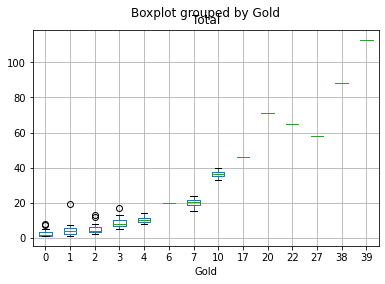

In [15]:
# Box plot

plt.figure(figsize=(15, 11))
medal.boxplot(column="Total", by="Gold", ax=None)

***Frequency Tables and Histogram***
- Frequency table divides the values of a variable into equally spaced segments, quantify the number of observations in each segment (basically a histogram not visualized).

In [16]:
# Frequency Table

frequency_table = medal.copy()
frequency_table["freq"] = pd.cut(medal["Gold"], 10)
frequency_table.groupby("freq")["Rank"].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


<AxesSubplot:ylabel='Frequency'>

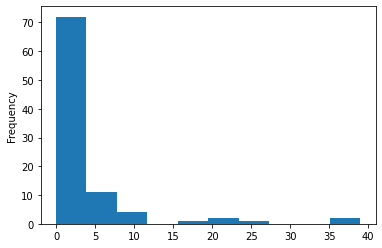

In [17]:
# Histogram

medal["Gold"].plot(kind="hist")

(array([50., 11., 11.,  5.,  2.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ,
        14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. , 27.3,
        28.6, 29.9, 31.2, 32.5, 33.8, 35.1, 36.4, 37.7, 39. ]),
 <BarContainer object of 30 artists>)

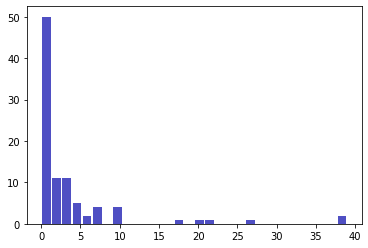

In [18]:
# Histogram 2

plt.hist(x=medal["Gold"], bins="auto", color="#0504aa", 
                         alpha=0.7, rwidth=0.85)

### **Statistical Moments:**
- **First Moment Is Location(Mean):** Average of all the data.

- **Second Moment Is Variability:** How closely values are spread around the mean (or another measure of central tendency).
  
- **Third Moment Is Skewness:** Direction of the tail of the data -> discover through visualization not a metric.

- **Fourth Moment Is Kurtosis:** Propensity for data to have extreme values -> discovered through visualization not a metric.

## Density Plots and Estimates:
- A density plot is a smoothed histogram and shows the distribution of the data values as a continuous line and the y-axis is plotted as a proportion.
- The propertion part is the key difference here and the reason that density plots are not the same as histogram.

Text(0.5, 0, 'Gold Medal Rate (per country)')

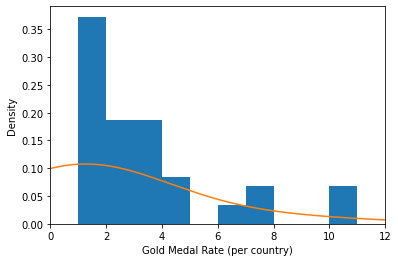

In [19]:
# Density Plots

ax = medal["Gold"].plot.hist(density=True, xlim=[0,12], bins=range(1, 12))
medal["Gold"].plot.density(ax=ax)
ax.set_xlabel("Gold Medal Rate (per country)")

## Exploring Binary and Categorical Data:

**Mode:** 
- Value that appears most often.

**Expected Value:** 
- Sum of each value multiplied by the probablity of occurence.

**Bar Charts:** 
- Plots each variable against it's frequency or proportion.

**Pie Charts:** 
- Plots the frequency of each category as wedges of a pie.
- Generally not a recommended chart type as the size of each pie can be difficult to compare.

**Note:** 
- Probablities are another way to describe categorical or binary data by grouping each variable with its likelihood of being choosen (proportion of the entire dataset).

In [20]:
# Mode

medal["Gold"].mode()

0    0
Name: Gold, dtype: int64

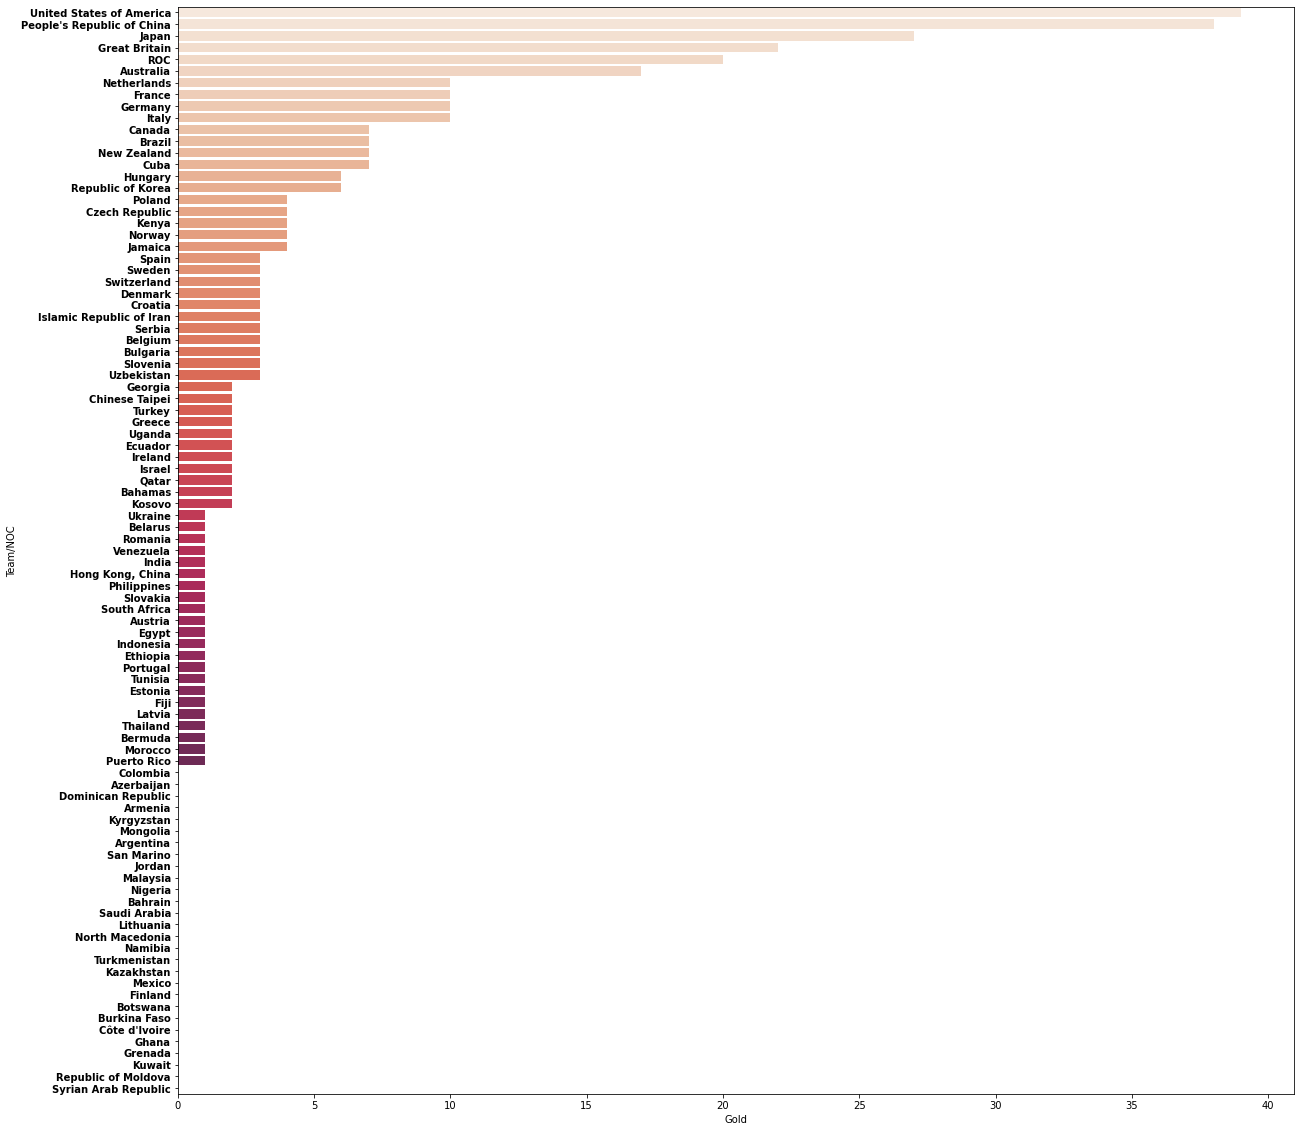

In [21]:
# Bar Plots

plt.figure(figsize=(20, 20))
sns.barplot(x="Gold", y="Team/NOC", data=medal, palette="rocket_r")
plt.yticks(weight="bold")
plt.show()

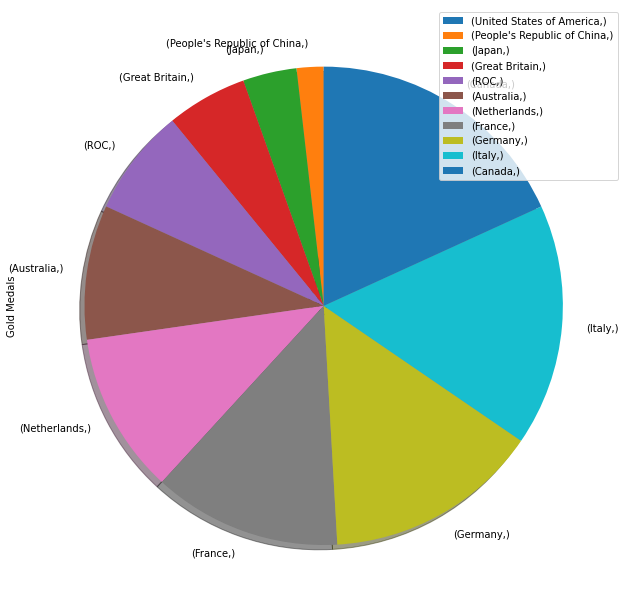

In [22]:
# Pie Chart
%matplotlib inline
df = pd.DataFrame({"Gold Medals" : range(0, 44, 4)},
                   index=medal.loc[0:10, ["Team/NOC"]])

plot1 = df.plot.pie(y="Gold Medals", figsize=(15, 11), startangle=90, shadow=True)

## Correlation:
**Correlation Coefficient:**
- Generally use pearson's correlation coefficient.
- The PCC is sensitive to outliers.
- This measures how change in one variable can change another variable.

**Correlation Matrix:**
- Shows the correlation between all the variables in a dataset.
- The primary diagonal will be the entire way down.

**Scatter Plot:** 
- Plots one numerical variable on one axis vs another on a different axis with each point correlating to a record.
- Scatter plots offer an excellent way to measure relationship between two variables.
- You can use scatterplots against all of the variables in your dataset to deduce relationships that would not otherwise be apparent.

In [23]:
# Corr

cor = medal.corr()
cor

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


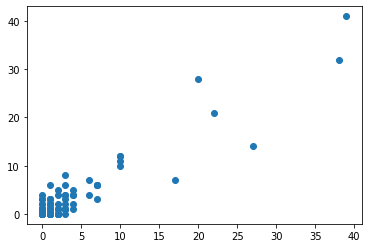

In [24]:
# Scatter Plot

plt.scatter(x="Gold", y="Silver", data=medal)
plt.show()

## Exploring Two Or More Variables:
- Means and variances are form of **Univariate Analysis**.
- Correlation is a form of **Bi-variate Analysis**, and methods that look at more than two variables simultaneously are called **Multi-Variate Analysis**.
- After analyzing individual variables, you'll usually want to see how different variables interact with one another.
- When deciding which method to use, you must first determine whether you are comparing anumerical variables with one another, numerical VS categorical or categorical variables to one another.

**Contingency Table:**
- Tally count between two or more variables.

**Hexagonal binning:**
- Plots of two numeric variables with records binned into hexagons.

**Contour Plots:**
- Plots showing the density of two numeric variables similar to a topographical map.

**Violin Plot:** 
- Box plots for density estimates.

### Numeric Vs Numeric Data:

**Hexagonal Binning:**
- If you have a large number of values than scatter plots become too hectic to actually gain any insights from, enter the hexagonal binning plot.
- One major benefit of the hexagonal binning is that, by binning the data, the number of points that your computer has to render goes down substantially and offers speed benefits and reduces the size of jupyter notebooks.

**Contour Plots:**
- Contour Plots are overlaid onto scatter plots and offer a layer of lines that help determine where the data is most dense.

**Heat Maps:**
- Heat Map offers another way to look at data by using colors to communicate densities.
- Heat Maps can also be used with categorical variables.

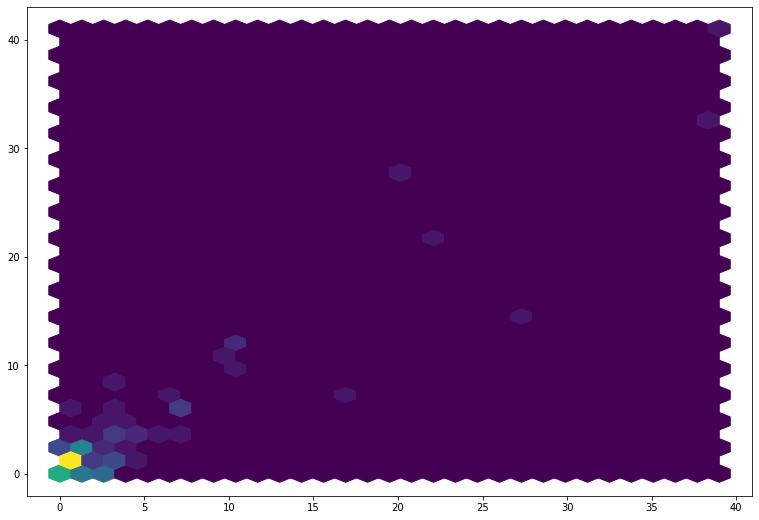

In [25]:
# Hexagonal Binning

plt.figure(figsize=(13, 9))
plt.hexbin(x="Gold", y="Silver", data=medal, gridsize=30)
plt.show()

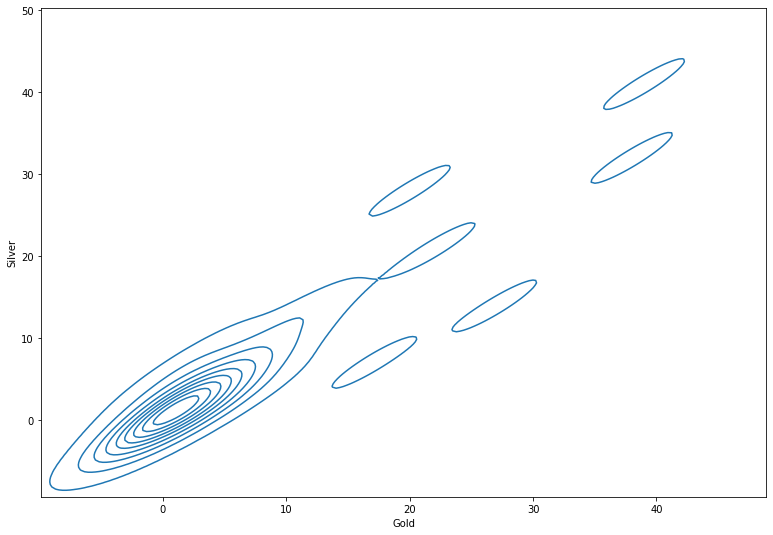

In [26]:
# Contour Plot

plt.figure(figsize=(13, 9))
sns.kdeplot(x="Gold", y="Silver", data=medal)
plt.show()

<AxesSubplot:>

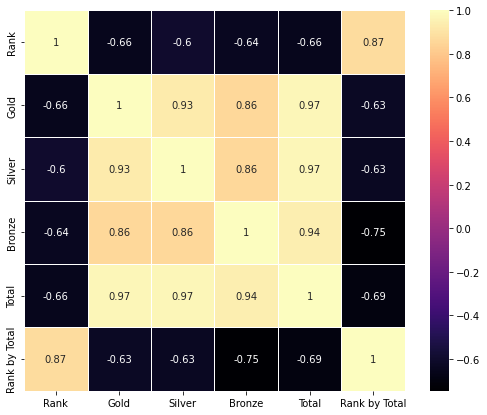

In [27]:
# Heat Map

plt.figure(figsize=(9, 7))
sns.heatmap(cor, annot=True, square=True, linewidths=0.5, cmap="magma")

### Categorical Vs Categorical Data:

**Contingency Table:** 
- Contingency table counts the number of instances of two variables within dataset.
- You can also use other metrics like the proportion and percent of each variable combination if you want to as well.
- You can get the counts just creating a pivot table like so.



In [28]:
# Contingency Table

crosstab = medal[["Team/NOC", "Gold"]].pivot_table(index="Team/NOC", columns="Gold", aggfunc=lambda x : len(x) , margins=True)
crosstab.fillna(0)

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Team/NOC,,,,,,,,,,,,,,,
Argentina,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Armenia,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
Austria,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Azerbaijan,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ukraine,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
United States of America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
Uzbekistan,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


## Categorical Vs Numerical Data:
- Categorical and numerical variables can also be compared with a number of methods.

**Box Plots:**
- You can create a box plot that is calculated using the numerical variable for each category available.

**Violin Plots:**
- Violin plots are variations of boxlots which shows the distribution of values within the boxes.
- This helps to see where the density of values biases.

**Categorical Heatmap:**

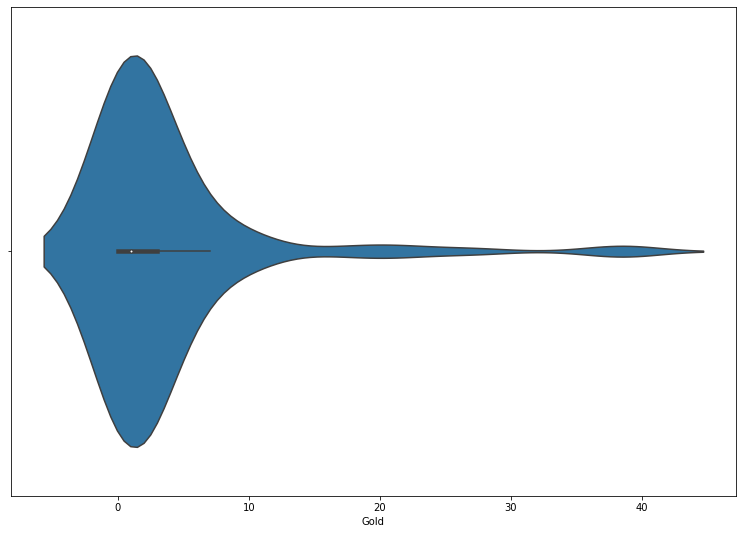

In [29]:
# Violin Plots

plt.figure(figsize=(13, 9))
sns.violinplot(x=medal["Gold"])
plt.show()

## Visualizing The Multiple Variables:
- If you want to compare multiple variables to one another, you can use a Facet or Trellis plot which essentially lines up different variables on the same x and y axes and plots them on multiple plots.
- This function is easily supported with Plotly library. 